# EDA of CAISO Demand Data
This notebook is used to introduce and explore the CAISO electrical demand data

### Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Read in data

In [4]:
ts = pd.read_csv('../datasets/time_series/demand_series.csv')
print(ts.shape)
ts.head(3)

(220703, 4)


,date,forecast,demand,net_demand
0,2018-04-12 00:00:00,21942.0,21825.0,17634.0
1,2018-04-12 00:05:00,21661.0,21694.0,17555.0
2,2018-04-12 00:10:00,21661.0,21619.0,17430.0


#### Resample to get hourly averages

In [5]:
ts['date'] = pd.to_datetime(ts['date'])
ts.set_index('date', inplace=True)
mwh = ts.resample('H').mean()
print(mwh.shape)
mwh.head(3)

(18504, 3)


,forecast,demand,net_demand
date,,,
2018-04-12 00:00:00,21429.250000,21373.250000,17073.333333
2018-04-12 01:00:00,20564.083333,20519.916667,16348.083333
2018-04-12 02:00:00,20070.083333,20067.416667,15830.250000


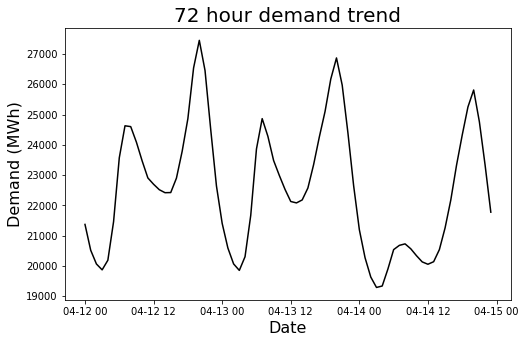

In [14]:
plt.figure(figsize=(8,5))
plt.plot(mwh.index[0:72],mwh['demand'][0:72],'k')
plt.title('72 hour demand trend',fontsize=20)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Demand (MWh)',fontsize=16);

**72 hour demand trend**
- Thurs/Fri/Saturday April 12-14
- Each day there are two peaks (11am, 10pm) and two minima (12 noon, 1am)
- Saturday shows much lower morning output

#### Daily and monthly resample

In [17]:
ds = mwh.resample('D').mean()
ds.head(3)

,forecast,demand,net_demand
date,,,
2018-04-12,23186.263573,23164.906881,16380.165404
2018-04-13,23078.515152,23069.206439,17573.027146
2018-04-14,21503.301768,21475.017045,16372.051136


In [18]:
ms = mwh.resample('M').mean()
ms.head(3)

,forecast,demand,net_demand
date,,,
2018-04-30,22858.806057,22839.483344,16804.712771
2018-05-31,23946.758207,23937.419436,16949.069485
2018-06-30,26780.101926,26761.350852,19537.449369


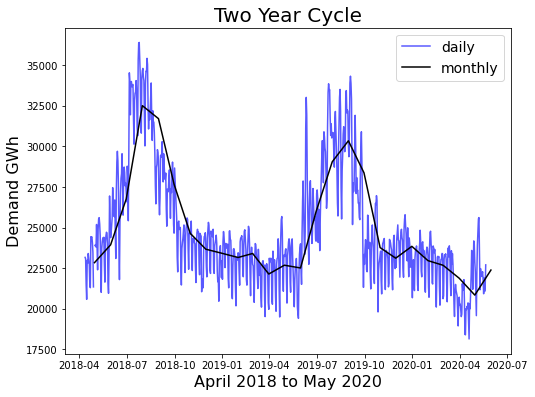

In [19]:
plt.figure(figsize=(8,6))
plt.plot(ds['demand'],'b-',label='daily',alpha=0.65)
plt.plot(ms['demand'],'k-',label='monthly')
plt.xlabel('April 2018 to May 2020',fontsize=16)
plt.ylabel('Demand GWh',fontsize=16)
plt.title('Two Year Cycle',fontsize=20)
plt.legend(fontsize=14);